# Install Required Libraries

In [ ]:
# install libraries
# to let the notebook install libs same with python version 3.10
import sys
!{sys.executable} -m pip install xgboost

# Import Required Libraries

In [16]:
# import libraries

import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import warnings
import numpy as np
from numpy import array
from importlib import reload # to reload modules if we made changes to them without restarting kernel
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier # for features importance

warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 227 # native screen dpi for my computer

# Download Stock Data

In [ ]:
# download stock data & save into data/stocks/ + symbol.csv

import yfinance as yf

# download data from yahoo finance
def download_stock_data(symbol,start="2020-01-01",end="2021-01-01"):
    data = yf.download(symbol, start=start, end=end)
    return data

# save data to csv
def save_to_csv(data, symbol):
    data.to_csv(f'data/stocks/' + symbol + '.csv')

# download and save TLSLA stock 
symbol = 'TSLA'
data = download_stock_data(symbol)
save_to_csv(data, symbol)
    

# Loading Data

In [24]:
files = os.listdir('data/stocks')
stocks = {}
for file in files:
    # Include only csv files
    if file.split('.')[1] == 'csv':
        name = file.split('.')[0]
        stocks[name] = pd.read_csv('data/stocks/'+file, index_col='Date')
        stocks[name].index = pd.to_datetime(stocks[name].index)

# Preprocessing Data 

In [ ]:
# 1. loop through stocks
# 2. calculate return by percentage change from previous day close price
# 3, drop NaN values
# 4. plot return
for stock in stocks:
    stocks[stock]['Return'] = stocks[stock]['Close'].pct_change()
    stocks[stock] = stocks[stock].dropna()
    
stocks['TSLA'].head()


# Baseline Model

In [54]:
# import accuracy_score
from sklearn.metrics import accuracy_score

def baseline_model(stock):
    '''
    \n\n
    Input: Series or Array
    Returns: Accuracy Score
    Function generates random numbers [0,1] and compares them with true values
    \n\n
    '''
    # generate random numbers
    baseline_predictions = np.random.randint(0,2, len(stock))
    # compare with true values 
    # please parse stock into binary format (0,1)
    stock_binary = stock.apply(lambda x: 1 if x > 0 else 0)
    accuracy = accuracy_score(stock_binary, baseline_predictions)
    return accuracy


# Accuracy Score

In [55]:
baseline_accuracy = baseline_model(stocks['TSLA'].Return)
print('Baseline model accuracy: {:.1f}%'.format(baseline_accuracy * 100))

Baseline model accuracy: 53.3%


# Accuracy Distribution

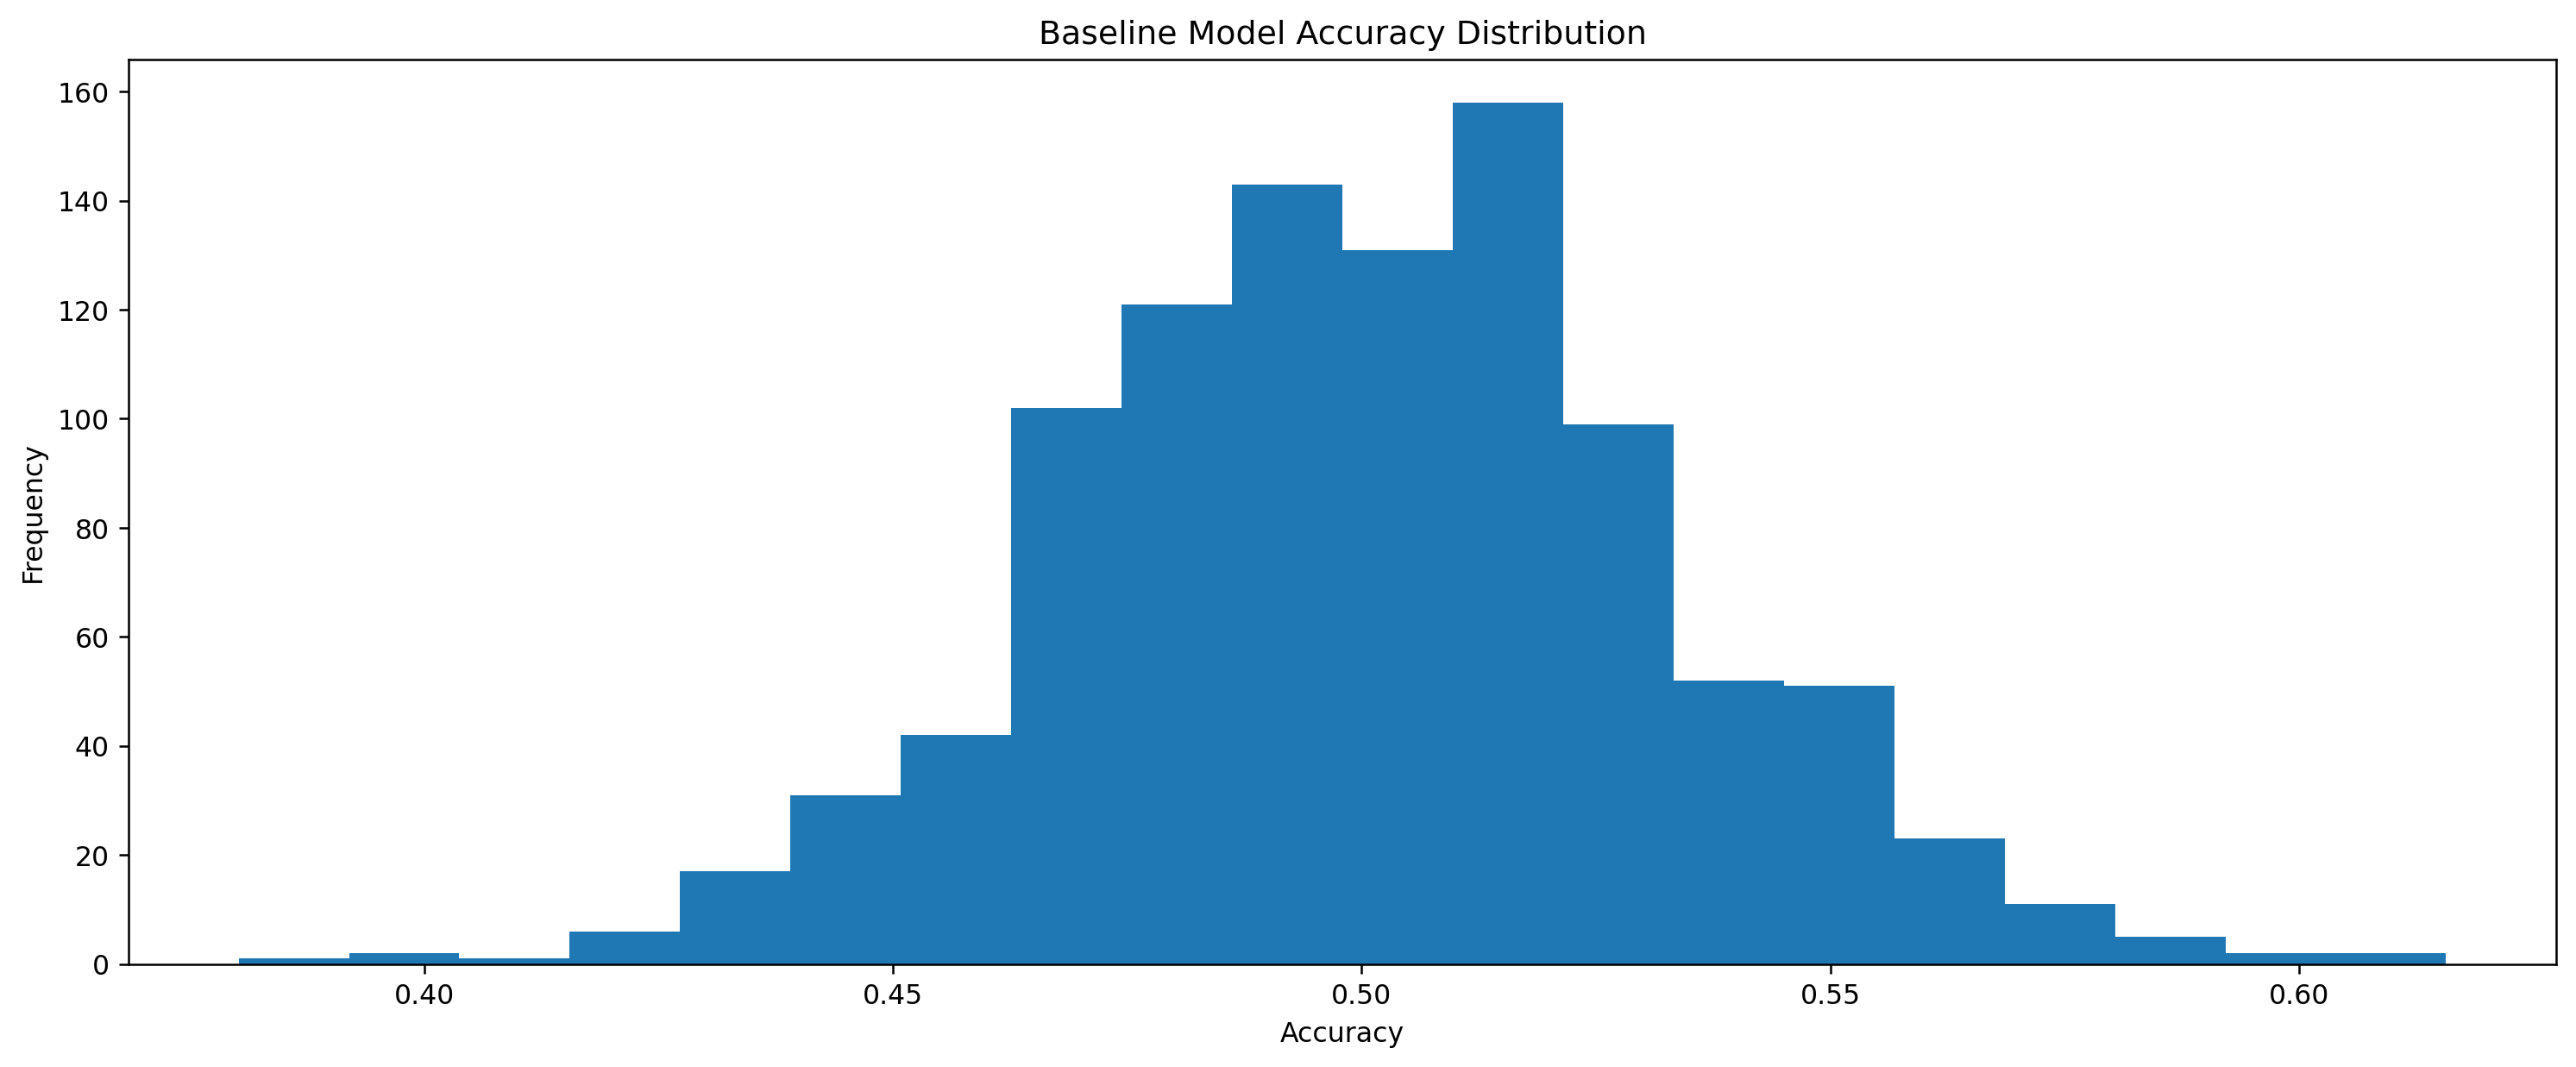

In [77]:
# plot accuracy distribution of baseline model
base_predictions = []
stock = stocks['TSLA'].Return
for i in range(1000):
    base_predictions.append(baseline_model(stock))

plt.figure(figsize=(16,6))
plt.hist(base_predictions, bins=20)
plt.title('Baseline Model Accuracy Distribution')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()